K-Nearest Neighbours classifier
----------------------------------------------
In pattern recognition, the k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification.
Depending on the class of the k closest training examples in the feature space ,the class of the test case is predicted. 
k-NN is a type of instance-based learning, or lazy learning.

It basically predicts the class of the test case by considering the majority of the class of the K nearest neighbors. 
It is a simple model that doesn't require any trainning time.

A commonly used distance metric for continuous variables is Euclidean distance.
For discrete variables, such as for text classification, another metric can be used, such as the overlap metric (or Hamming distance)

Importing the required libraries
---------------------------------------------

In [165]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

Loading the IRIS Dataset
---

In [166]:
from sklearn.datasets import load_iris 
iris=load_iris()
#print(iris)

Visualising the data using seaborn
----

class_0 : Iris-Setosa 
class_1 : Iris-Versicolour  
class_2 : Iris-Virginica


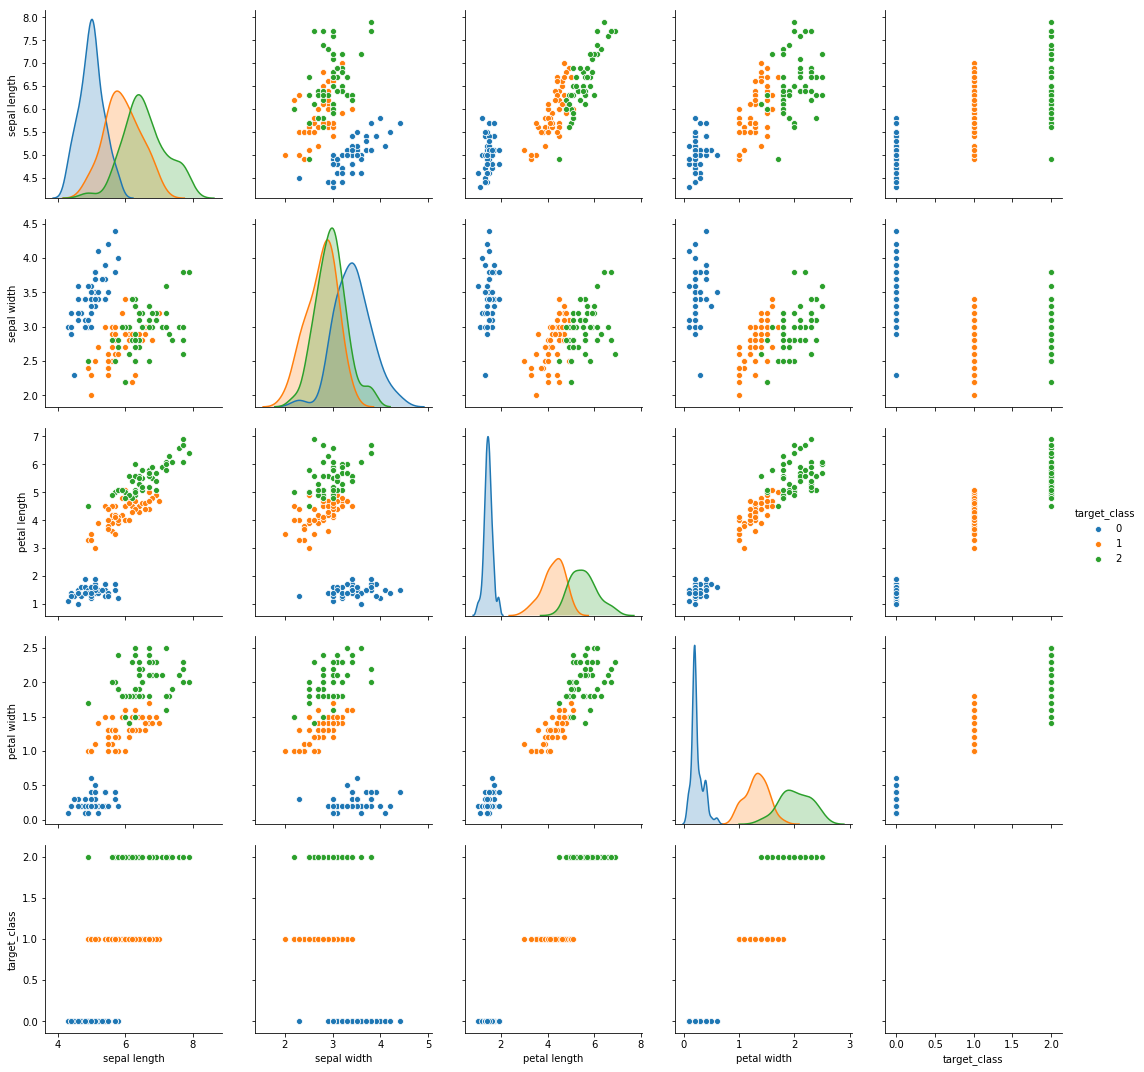

In [168]:
 data={'sepal length':iris['data'][:,0],
       'sepal width' :iris['data'][:,1],
       'petal length':iris['data'][:,2],
       'petal width' :iris['data'][:,3],
       'target_class':iris['target']
      }
print("class_0 : Iris-Setosa \nclass_1 : Iris-Versicolour  \nclass_2 : Iris-Virginica")
df=pd.DataFrame(data,columns=['sepal length','sepal width','petal length','petal width','target_class'])
sns.pairplot(df,hue='target_class',height=3)
plt.show(sns)

Splitting the dataset into Train and Test data
----------

In [169]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(iris['data'],iris['target'], test_size = 0.2, random_state = 0)


Euclidean distance to find distance between two instances
----

In [170]:
def euclidean_distance(x1,x2):
    return np.sqrt(np.sum((x1 - x2)**2))


Getting the k-Nearest neighbors by taking the k trainning samples that are at least distance from the test case
---

In [171]:
import operator
def get_k_neighbors(x_train,test,k):
    distance_vector={}
    for i in range(len(x_train)):
        distance_vector[i]=euclidean_distance(test,x_train[i])
    dist_sorted=sorted(distance_vector.items(),key=operator.itemgetter(1))
    neighbors=[]
    for i in range(k):
        neighbors.append(dist_sorted[i][0])
    return neighbors

Predicting the class of the test case based on the output class of the k nearest neighbors obtained
--

In [172]:
def predict(neighbors,y_train,test):
    class_0=0
    class_1=0
    class_2=0
    for i in range(len(neighbors)):
        if(y_train[neighbors[i]] == 0):
            class_0+=1
        elif(y_train[neighbors[i]] == 1):
            class_1+=1
        else:
            class_2+=1
    if(class_0>class_1):
        if(class_0>class_2):
            return 0
        else:
            return 2
    else:
        if(class_1>class_2):
            return 1
        else:
            return 2
  


knn model
-----

In [173]:
def knn(x_train,y_train,x_test,k):
    class_pred=[]
    for i in range(0,len(x_test)):
        k_neighbors = get_k_neighbors(x_train,x_test[i],k)
        class_pred.append(predict(k_neighbors,y_train,x_test[i]))
    return class_pred

Predicting the Accuracy
---

In [174]:
def accuracy(y_true,y_predict):
    count = 0
    for i in range(len(y_true)):
        if(y_true[i] == y_predict[i]):
            count +=1
    return count*1.0/len(y_true)

Running the developed model for k=2 to 21
---

In [175]:
k_list=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]
test_acc=[]
train_acc=[]
err_train=[]
err_test=[]
for k in k_list:
    y_predict1 = knn(x_train,y_train,x_train,k)
    train_acc.append(accuracy(y_train,y_predict1))
    err_train.append(1-accuracy(y_train,y_predict1))
    y_predict2 = knn(x_train,y_train,x_test,k)
    test_acc.append(accuracy(y_test,y_predict2))
    err_test.append(1-accuracy(y_test,y_predict2))

In [176]:

print("\n\n\n#######   Training Accuracy with KNN MODEL DEVELOPED   #######")   
for i in range(0,len(k_list)):
    print("Training accuracy achieved with k = ",k_list[i]," is ",train_acc[i])
    

print("\n#######    Testing Accuracy with KNN MODEL DEVELOPED     #######")
for i in range(0,len(k_list)):
    print("Testing accuracy achieved with k = ",k_list[i]," is ",test_acc[i])




#######   Training Accuracy with KNN MODEL DEVELOPED   #######
Training accuracy achieved with k =  2  is  0.975
Training accuracy achieved with k =  3  is  0.95
Training accuracy achieved with k =  4  is  0.95
Training accuracy achieved with k =  5  is  0.95
Training accuracy achieved with k =  6  is  0.95
Training accuracy achieved with k =  7  is  0.9666666666666667
Training accuracy achieved with k =  8  is  0.9583333333333334
Training accuracy achieved with k =  9  is  0.9583333333333334
Training accuracy achieved with k =  10  is  0.9583333333333334
Training accuracy achieved with k =  11  is  0.9583333333333334
Training accuracy achieved with k =  12  is  0.9583333333333334
Training accuracy achieved with k =  13  is  0.9583333333333334
Training accuracy achieved with k =  14  is  0.95
Training accuracy achieved with k =  15  is  0.9583333333333334
Training accuracy achieved with k =  16  is  0.95
Training accuracy achieved with k =  17  is  0.9583333333333334
Training accura

Plotting the Error_rate vs k
----------
Error_rate=1-accuracy


Text(0, 0.5, 'Error_rate')

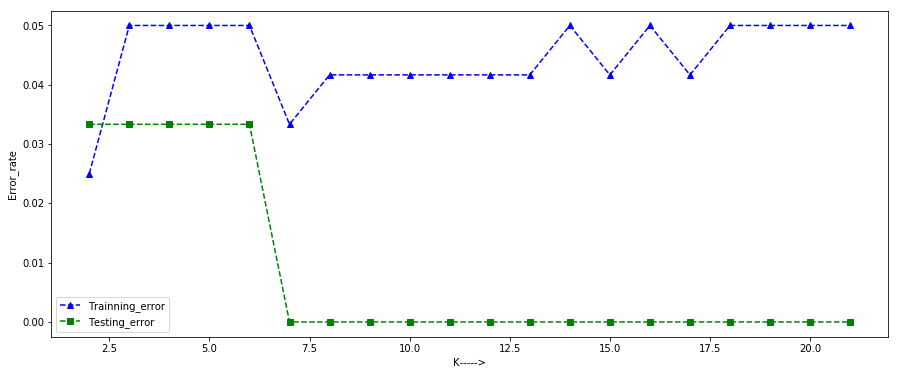

In [177]:
plt.figure(figsize=(15,6))
plt.plot(k_list,err_t,color='blue',linestyle='dashed',marker='^',label="Trainning_error")
plt.plot(k_list,err,color='green',linestyle='dashed',marker='s' ,label="Testing_error")
plt.legend()
plt.xlabel("K----->")
plt.ylabel("Error_rate")



Choosing a value of k
---------------------------
We can choose the optimal k for the model by observing the error rate vs k curve.

Clearly in the above curve you could observe that

For k=7
Both the trainning and test error rate are considerably low.
And for k>7 the trainning error_rate is greater than that of obtained fro k=7. There is no significant increase in the test error rate.

So optimal value of k for this Dataset is k=7 

Classification metrics for optimal value of k=7
---

In [178]:

print("For k=7")
ypredict1 = knn(x_train,y_train,x_train,7)
print("Accuracy for trainning data is : ",accuracy(y_train,ypredict1))
print("Trainning data error rate is :",1-accuracy(y_train,ypredict1))
ypredict2 = knn(x_train,y_train,x_test,7)
print("\nAccuracy for test data is : ",accuracy(y_test,ypredict2))
print("Test data error rate is :",1-accuracy(y_test,ypredict2))


For k=7
Accuracy for trainning data is :  0.9666666666666667
Trainning data error rate is : 0.033333333333333326

Accuracy for test data is :  1.0
Test data error rate is : 0.0
